In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01.+Country+clusters[1].csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [6]:
dff = pd.DataFrame({'name':['ritik','tanuj','siddharth'],'selection':['yes','yes','no']})

In [7]:
dff['selection1'] = dff['selection'].map({'yes':1,'no':0})

In [8]:
dff

,name,selection,selection1
0,ritik,yes,1
1,tanuj,yes,1
2,siddharth,no,0


In [16]:
z = dff.iloc[:,1:3]

In [18]:
z.values

array([['yes', 1],
       ['yes', 1],
       ['no', 0]], dtype=object)

### map the data

In [4]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped['Language'].map({"English":0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### select the features

In [5]:
x = data_mapped.iloc[:,2:4]

In [6]:
x

,Longitude,Language
0,-103.77,0
1,-96.80,0
2,2.40,1
3,-2.53,0
4,10.40,2
5,133.11,0


### clustering

In [7]:
kmeans = KMeans(2)

### clustering results

In [39]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([3, 5, 1, 5, 4, 7, 0, 5, 2, 2, 0, 4, 1, 8, 5, 6, 2, 2, 5, 6, 6, 3,
       4, 3, 4, 0, 6, 0, 3, 4])

In [9]:
data_with_cluster = data_mapped.copy()
data_with_cluster['cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,1


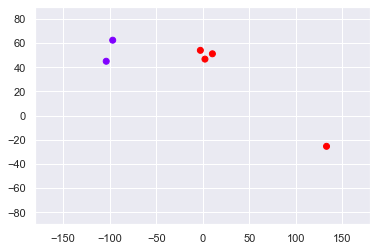

In [10]:
plt.scatter(data_with_cluster["Longitude"],data_with_cluster['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [11]:
kmeans.inertia_

12726.177350000004

In [12]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [13]:
wcss

[37435.42988333333,
 12726.177350000004,
 111.45371666666666,
 36.942899999999995,
 12.652449999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within cluster sum of squares')

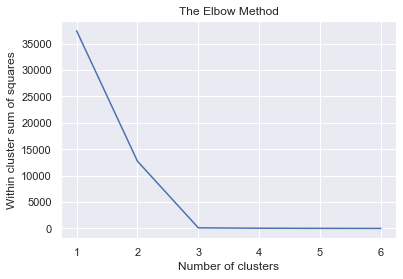

In [14]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

a two cluster soluton would be  suboptimal as the leap from  2 to 3 is very big

#### pro and cons of cluster analysis

### Market segmentation example
#### Import important libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

 ### load the data

In [16]:
data = pd.read_csv('3.12.+Example.csv')

In [17]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


satisfaction is self report of shoping experience type of from 1 to 10

loyality - there is no widely accepted technique to measure it but there are porxies like chrun rate, tentention rate, or customer lifetime value (clv)
 - purchases for 1y + other factors range(-2.5 to 2.5)

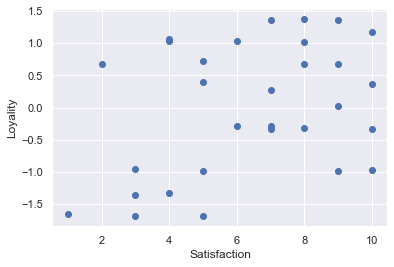

In [18]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

### select the features

In [19]:
x = data.copy()

In [20]:
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### clustering

In [21]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

### clustering results

In [22]:
clusters = x.copy()

In [23]:
clusters['cluster_pred']=kmeans.fit_predict(x)


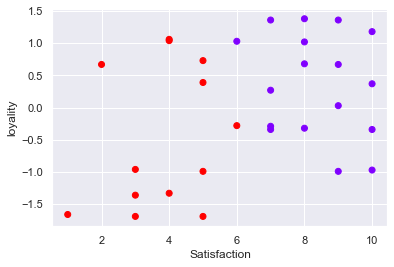

In [24]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('loyality')
plt.show()

### standadize the variables

In [25]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

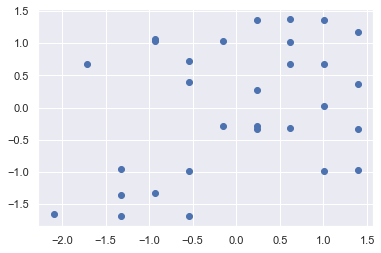

In [26]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],cmap='hot')
plt.show()

### take advantage of Elbow method

In [27]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.589288254024855,
 5.439005881436061,
 4.437207370163693,
 3.84467313926165]

Text(0, 0.5, 'WCSS')

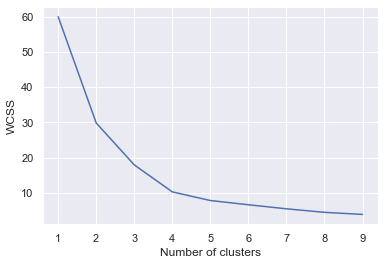

In [28]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

there are 5 points of cluster can be seen in this graph

In [29]:
# array = np.arange(20).reshape(10,2)
# array
# array.shape

# plt.scatter(array[:,0],array[:,1])
# plt.show()

#### explore the clustering solutions and select the number of clusters

In [30]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


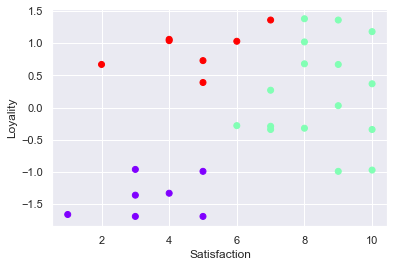

In [31]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

cluster (kmeans ) 5 and 4 are best for the model

how clustering useful in actual
- types of clustering analysis
- Explorator  - get acquainted with the data search for patterns plan, techniques-data visualization ,clustering, data describe
- confirmatory - explain a  phenomenon and confirm a hypothesis valiadate previous reaserch, this is the like analysis of linear regression 

### types of cluster 
- flat
- Hierarchical

example of flat cluster is kmeans cluster

Hierarchical cluster it is also mention in the copy

### heatmaps

In [32]:
heatdata = pd.read_csv('3.01.+Country+clusters[1].csv',index_col='Country')
heatdata

,Latitude,Longitude,Language
Country,,,
USA,44.97,-103.77,English
Canada,62.40,-96.80,English
France,46.75,2.40,French
UK,54.01,-2.53,English
Germany,51.15,10.40,German
Australia,-25.45,133.11,English


In [33]:
heatdata_scaled = heatdata.copy()

In [34]:
heatdata_scaled = heatdata_scaled.drop(['Language'],axis=1)

In [35]:
heatdata_scaled

,Latitude,Longitude
Country,,
USA,44.97,-103.77
Canada,62.40,-96.80
France,46.75,2.40
UK,54.01,-2.53
Germany,51.15,10.40
Australia,-25.45,133.11


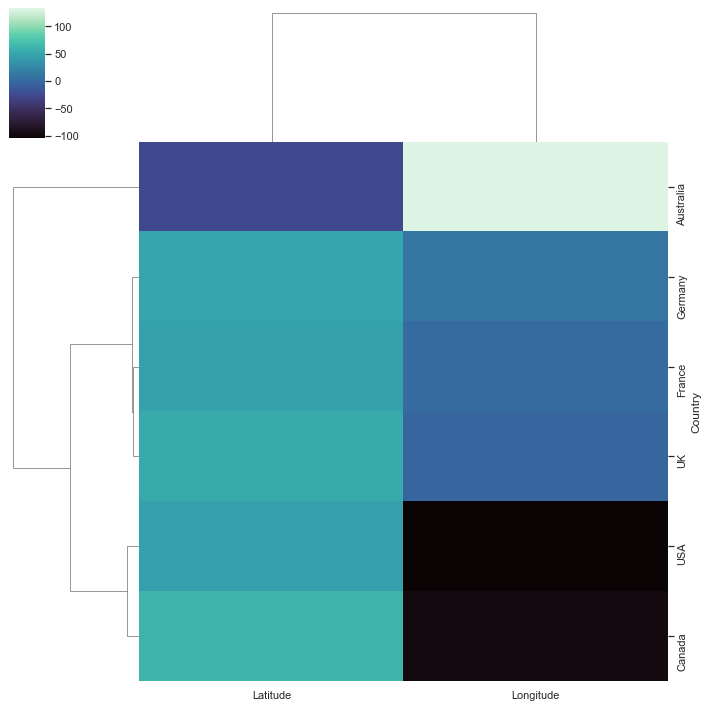

In [36]:
sns.clustermap(heatdata_scaled,cmap='mako')